## Arbitrary value imputation
Repalcing a NAN with an arbitrary value.
The aribitrary value can be an outlier (left or right) OR any value that is not occuring in high frequency

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("titanic_train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

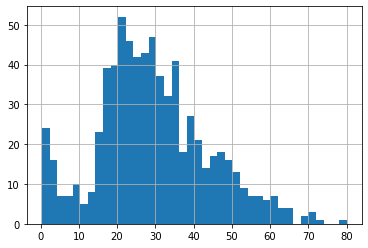

In [8]:
df.Age.hist(bins=40)

In [9]:
def replace_nan(df,variable):
    df[variable+'_0'] = df[variable].fillna(0)
    df[variable+'_100'] = df[variable].fillna(100)

In [10]:
replace_nan(df,"Age")

In [11]:
df.head()

,Survived,Age,Fare,Age_0,Age_100
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


<AxesSubplot:>

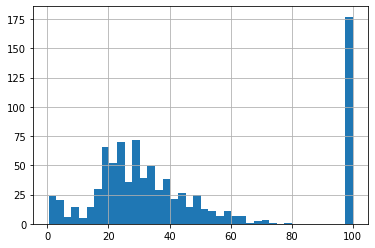

In [14]:
df.Age_100.hist(bins=40)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:ylabel='Density'>

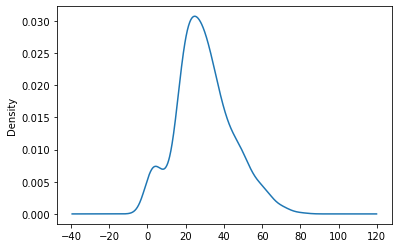

In [19]:
df["Age"].plot(kind="kde")

<AxesSubplot:ylabel='Density'>

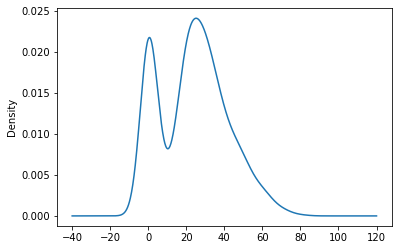

In [20]:
df["Age_0"].plot(kind="kde")

<AxesSubplot:ylabel='Density'>

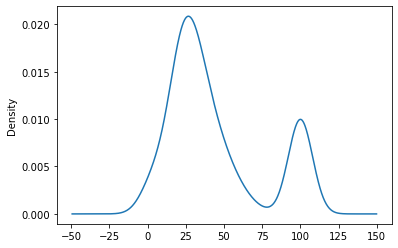

In [21]:
df["Age_100"].plot(kind="kde")

### Advantages
1. easy to implement
2. takes care of the missing values

### Disadvantages
1. distorts the original distribution
2. masks the original prediction 

# 6. Frequent categories imputation

How to handle categorical missing values ?


In [29]:
df = pd.read_csv("loan.csv",usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BsmtQual     1423 non-null   object
 1   FireplaceQu  770 non-null    object
 2   GarageType   1379 non-null   object
 3   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


In [30]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [31]:
df.dtypes

BsmtQual       object
FireplaceQu    object
GarageType     object
SalePrice       int64
dtype: object

In [32]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [45]:
# Now we will see the levels in each of the above categorical variables

<AxesSubplot:xlabel='BsmtQual'>

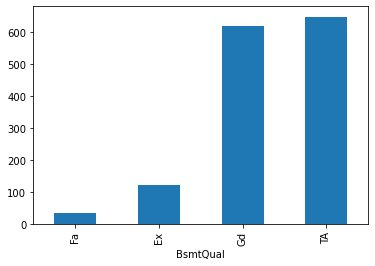

In [38]:
df.groupby("BsmtQual")["BsmtQual"].count().sort_values().plot.bar()

<AxesSubplot:>

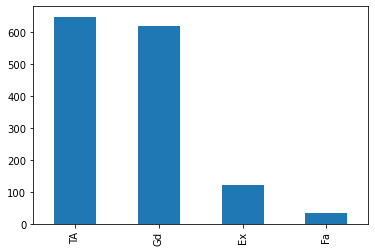

In [42]:
df["BsmtQual"].value_counts().plot.bar()

<AxesSubplot:>

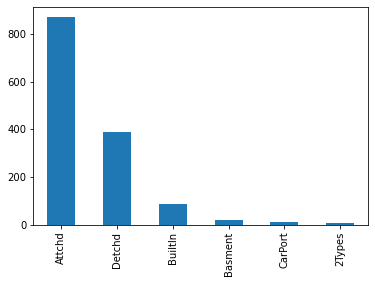

In [43]:
df["GarageType"].value_counts().plot.bar()

<AxesSubplot:>

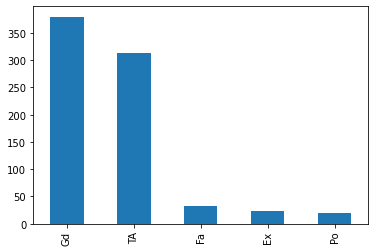

In [44]:
df["FireplaceQu"].value_counts().plot.bar()

In [49]:
df["GarageType"].value_counts().index[0]

'Attchd'

In [52]:
# replace the NAN with the most frequent levels/categories
def cat_replace(df,variable):
    freq_cat = df[variable].value_counts().index[0]
    df[variable].fillna(freq_cat,inplace=True)

In [53]:
cat_replace(df,"BsmtQual")

In [54]:
cat_replace(df,"GarageType")

In [55]:
cat_replace(df,"FireplaceQu")

In [56]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [57]:
# We can get the most frequent category using mode

In [59]:
df["BsmtQual"].mode()[0]

'TA'

In [60]:
df["GarageType"].mode()[0]

'Attchd'

In [61]:
df["FireplaceQu"].mode()[0]

'Gd'

## Advantages
1. easy to implement
2. faster way to implement

## Disadvantage
1. may over -represent the most frequent values
2. distort the original distribution

# 7. Replacing the NAN with a new category value - One of the frequent used methods to replace missing category values

After the replace we can remove the older categorical variables

In [62]:
df = pd.read_csv("loan.csv",usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BsmtQual     1423 non-null   object
 1   FireplaceQu  770 non-null    object
 2   GarageType   1379 non-null   object
 3   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


In [63]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [64]:
def replace_nan(df,variable):
    df[variable+'_New'] = np.where(df[variable].isnull(),"Missing Value",df[variable])

In [65]:
for feature in ["BsmtQual","FireplaceQu","GarageType"]:
    replace_nan(df,feature)    

In [66]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_New,FireplaceQu_New,GarageType_New
0,Gd,NaN,Attchd,208500,Gd,Missing Value,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [68]:
## now we will drop the older categorical variables
df.drop(["BsmtQual","FireplaceQu","GarageType"],axis=1,inplace=True)

In [69]:
df.head()

,SalePrice,BsmtQual_New,FireplaceQu_New,GarageType_New
0,208500,Gd,Missing Value,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
